# Datasets Loaders and Transforms

This notebook shows an example of a training session for the paper:

```bibtex
@inproceedings{toussaint.dlmia.18,
    author = {Toussaint, Nicolas and Khanal, Bishesh and Sinclair, Matthew and Gomez, Alberto and Skelton, Emily and Matthew, Jacqueline and Schnabel, Julia A.},
    title = {Weakly Supervised Localisation for Fetal Ultrasound Images},
    booktitle = {Proceedings of the 4th Workshop on Deep Learning in Medical Image Analysis},
    year = {2018}
}
```

## Requirements

* Cuda >= 8
* Python>=3.5
* PyTorch: `pip3 install torch torchvision`
* Other Packages: [torchnet](https://github.com/pytorch/tnt), [spn](https://github.com/yeezhu/SPN.pytorch)
* [fetalnav](https://github.com/ntoussaint/fetalnav)

# Import and definition

In [1]:
%matplotlib inline

import os
import numpy as np
import os
import shutil
import time
import math
import random
from matplotlib import pyplot as plt

import torch
import torchvision
from torchvision import transforms as torchtransforms

from fetalnav.transforms import itk_transforms as itktransforms
from fetalnav.transforms import tensor_transforms as tensortransforms
from fetalnav.datasets.itk_metadata_classification import ITKMetaDataClassification

# functions to show an image
def imshow(img):
    npimg = img.numpy()
    return plt.imshow(np.transpose(npimg, (1, 2, 0)))


# Define Data directory

Use your own directory containing images ready for loading and transformation

In [2]:
# datadir = # <directory containing a subdirectory 'train' with >40 itk-readable image files>
datadir = "/home/nt08/data/fetalnav-paper/dataset/polar/test"

# Test different transformation combinations

In [16]:
import SimpleITK as sitk
im = sitk.ReadImage('/home/nt08/data/fetalnav-paper/dataset/polar/test/train/image_transducer0_2D_1531480132795_layer0.mhd')

print('tonumpy(resample(im)).dtype = {}'.format(tonumpy(resample(im)).dtype))
print('totensor(tonumpy(resample(im))).dtype = {}'.format(totensor(tonumpy(resample(im)))))


tonumpy(resample(im)).dtype = float64
totensor(tonumpy(resample(im))).dtype = 
( 0 ,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    0   52   39  ...    35   33   39
    0   53   25  ...    22   36   49
    0    7    0  ...     0    2   12
[torch.DoubleTensor of size 1x320x163]



In [21]:
t = totensor(tonumpy(resample(im)))
t


( 0 ,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    0   52   39  ...    35   33   39
    0   53   25  ...    22   36   49
    0    7    0  ...     0    2   12
[torch.DoubleTensor of size 1x320x163]

giving index=0:
tensor=
( 0 ,.,.) = 
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
           ...             ⋱             ...          
  0.0000  0.1276  0.2099  ...   0.1440  0.1564  0.1728
  0.0000  0.1276  0.1934  ...   0.1399  0.1605  0.1811
  0.0000  0.0576  0.0782  ...   0.0494  0.0741  0.1029
[torch.DoubleTensor of size 1x224x224]
:
label=[0. 1. 0. 1.]:
giving index=0:
tensor=
( 0 ,.,.) = 
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
           ...             ⋱             ...          
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.DoubleTensor of size 1x224x224]
:
giving index=1:
label=[0. 1. 0. 1.]:
tensor=
( 0 ,.,.

:tensor=
( 0 ,.,.) = 
  0.0000  0.0000  0.0000  ...   0.0079  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0079  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0079  0.0000  0.0000
           ...             ⋱             ...          
  0.0000  0.2016  0.3162  ...   0.4348  0.4387  0.4506
  0.0000  0.1779  0.2767  ...   0.4348  0.4269  0.4071
  0.0000  0.1897  0.2925  ...   0.3834  0.3715  0.3478
[torch.DoubleTensor of size 1x224x224]
:
label=[0. 1. 0. 1.]:
tensor=
( 0 ,.,.) = 
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
           ...             ⋱             ...          
  0.0000  0.0968  0.1694  ...   0.2581  0.2742  0.2944
  0.0000  0.0927  0.1573  ...   0.2500  0.2782  0.3105
  0.0000  0.0363  0.0524  ...   0.0726  0.1048  0.1371
[torch.DoubleTensor of size 1x224x224]
:

tensor=
( 0 ,.,.) = 
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.000

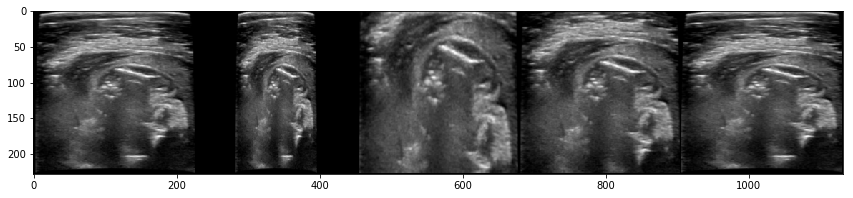

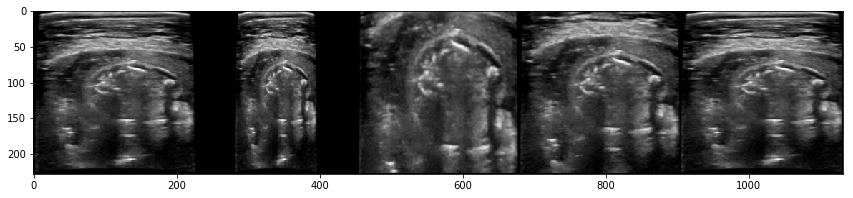

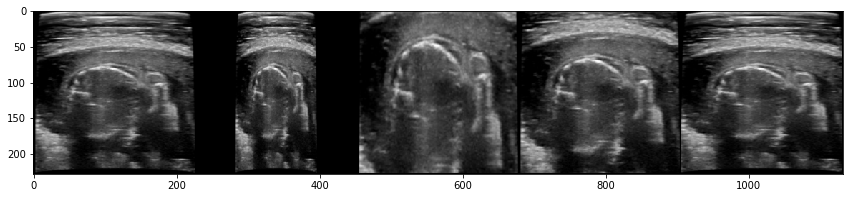

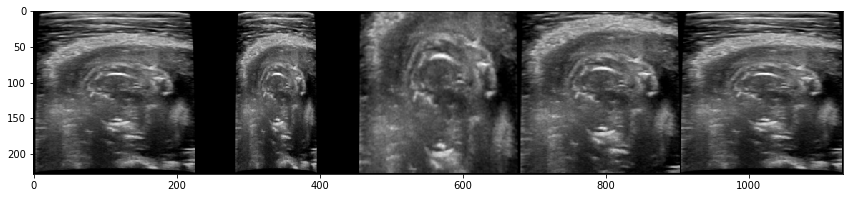

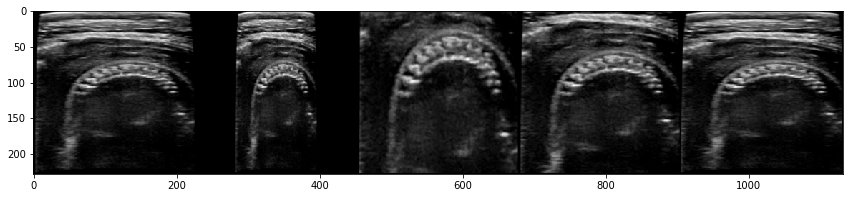

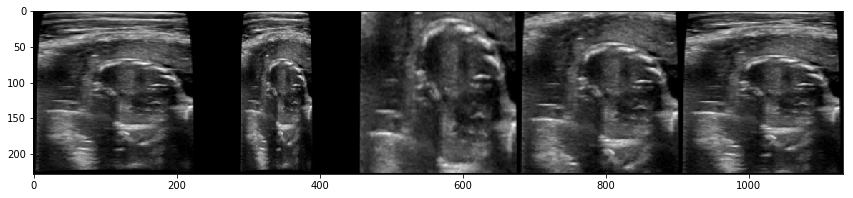

In [3]:
resample  = itktransforms.Resample(new_spacing=[.5, .5, 1])
tonumpy   = itktransforms.ToNumpy(outputtype='float')
totensor  = torchtransforms.ToTensor()
padd      = tensortransforms.PaddToRatio(outputaspect=1.)
cropabit  = tensortransforms.CropToRatio(outputaspect=1.)
cropnorm  = tensortransforms.CropToRatio(outputaspect=1.5)
cropalot  = tensortransforms.CropToRatio(outputaspect=2.)
resize    = tensortransforms.Resize(size=[224,224], interp='bilinear')
rescale   = tensortransforms.Rescale(interval=(0,1))
flip      = tensortransforms.Flip(axis=2)

transforms = []
transforms.append(torchtransforms.Compose([resample, tonumpy, totensor,           resize, rescale]))
transforms.append(torchtransforms.Compose([resample, tonumpy, totensor, padd,     resize, rescale]))
transforms.append(torchtransforms.Compose([resample, tonumpy, totensor, cropabit, resize, rescale]))
transforms.append(torchtransforms.Compose([resample, tonumpy, totensor, cropnorm, resize, rescale]))
transforms.append(torchtransforms.Compose([resample, tonumpy, totensor, cropalot, resize, rescale]))

loaders = []
iterators = []
for t in transforms:
    ds = ITKMetaDataClassification(root=datadir, mode='train', transform=t)
    ld = torch.utils.data.DataLoader(ds, batch_size=1, shuffle=False, num_workers=1)
    loaders.append(ld)
    iterators.append(iter(ld))

for idx in range(6):
    images = []
    for iterator in iterators:
        img, labels = iterator.next()
        images.append(img)
    plt.figure(idx, figsize=(3*len(iterators), 3))
    imshow(torchvision.utils.make_grid([img[0] for img in images]))

plt.show()

## About this notebook

written by Nicolas Toussaint

Contact: <nicolas.toussaint@gmail.com>